# Modelo regresión lineal
Se espera poder simular la Ye (Y esperada en base a un valor X)

* Ye= a + b*X + ei
* x= 100 valores distribuidos según una Normal(1.5,2.5)
* Ye= 3 +0.9 * X
* los errores e estarán distribuidos en un rango de (0,0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Valores de la distribución estudiada
X= 1.5+2.5*np.random.randn(100)
# errores 
res= 0+0.8*np.random.randn(100)
# Y predicha con la formula Ye
y_pred= 3 +0.9 * X
# Y real con la formula de Ye + el error.
Y_real= 3 +0.9 * X + res

In [3]:
# los datos generados la integramos a un dataframe con pandas
x_list= X.tolist()
y_pred_list= y_pred.tolist()
Y_real_list= Y_real.tolist()

In [4]:
data= pd.DataFrame({
    "x":x_list,
    "y_actual":Y_real_list,
    "Y_pred":y_pred_list
})
data.head()

,x,y_actual,Y_pred
0,0.859535,5.734250,3.773581
1,6.416563,7.576996,8.774907
2,-1.517418,1.807388,1.634323
3,-2.951158,-0.861022,0.343958
4,2.485770,6.017915,5.237193


In [5]:
y_mean_plot= [np.mean(Y_real)for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Comparación de valores predicho VS reales')

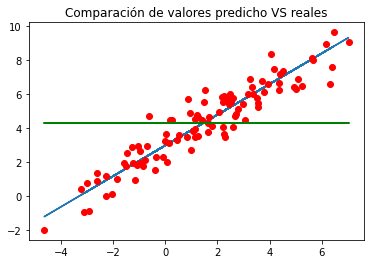

In [6]:
plt.plot(X,y_pred)
plt.plot(X,Y_real,"ro")
plt.plot(X,y_mean_plot,"g")
plt.title("Comparación de valores predicho VS reales")

In [7]:
data["SSR"]=(data["Y_pred"]-np.mean(data["y_actual"]))**2
data["SSD"]=(data["Y_pred"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-np.mean(data["y_actual"]))**2
data.head()

,x,y_actual,Y_pred,SSR,SSD,SST
0,0.859535,5.734250,3.773581,0.317219,3.844221,1.952856
1,6.416563,7.576996,8.774907,19.696765,1.434990,10.498851
2,-1.517418,1.807388,1.634323,7.303397,0.029951,6.397944
3,-2.951158,-0.861022,0.343958,15.942814,1.451976,27.017385
4,2.485770,6.017915,5.237193,0.810702,0.609527,2.826137


In [8]:
SSR=np.sum(data["SSR"])
SSD=np.sum(data["SSD"])
SST=np.sum(data["SST"])
print("el valor de SSR es "+ str(SSR))
print("el valor de SSD es "+ str(SSD))
print("el valor de SST es "+ str(SST))
print("La suma de SSR y SSD es "+ str(SSR+SSD))
print("El R2 del modelo es "+ str(SSR/SST))

el valor de SSR es 525.6561691211817
el valor de SSD es 67.92027693296272
el valor de SST es 547.1238549622295
La suma de SSR y SSD es 593.5764460541444
El R2 del modelo es 0.9607626579496706


(array([ 2.,  2.,  6., 15., 22., 20., 14., 14.,  4.,  1.]),
 array([-2.30445695, -1.86101352, -1.41757009, -0.97412666, -0.53068323,
        -0.0872398 ,  0.35620363,  0.79964707,  1.2430905 ,  1.68653393,
         2.12997736]),
 <a list of 10 Patch objects>)

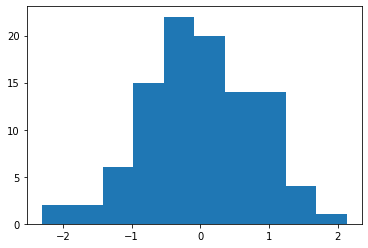

In [9]:
plt.hist((data["Y_pred"]-data["y_actual"]))

# Obteniendo la recta de la regresión
* xi Un valor X dentro del modelo de datos
* x_m La media de los valores X del modelo
* yi un valor observado Y dentro de los modelos de datos
* y_m la media de los valores observados
__________________________________
* Ye= a + b * x
* b = sum( (xi-x_m)*(yi-y_m) )/sum((xi-y_m)^2)
* a = y_m - b * x_m

In [10]:
# Se recupera beta (b) en cada numero del data set
data["beta_num"]=(data["x"]-np.mean(data["x"]))*(data["y_actual"]-np.mean(data["y_actual"]))
data["beta_den"]=(data["x"]-np.mean(data["x"]))**2
beta= sum(data["beta_num"])/sum(data["beta_den"])
alfa= np.mean(data["y_actual"]) - beta * np.mean(data["x"])
print("Modelo de regresión lineal")
print("Formula es Ye = "+str(alfa)+" + "+str(beta)+" * Xi")

Modelo de regresión lineal
Formula es Ye = 3.0476867518252693 + 0.8602562551744506 * Xi


In [11]:
#Ahora se modela las Y predictivas basandonos en este modelo
data["y_model_1"]= alfa + beta * data["x"]
data["SSR_model_1"]=(data["y_model_1"]-np.mean(data["y_actual"]))**2
data["SSD_model_1"]=(data["y_model_1"]-data["y_actual"])**2
data["SST_model_1"]=(data["y_actual"]-np.mean(data["y_actual"]))**2
data.head()

,x,y_actual,Y_pred,SSR,SSD,SST,beta_num,beta_den,y_model_1,SSR_model_1,SSD_model_1,SST_model_1
0,0.859535,5.734250,3.773581,0.317219,3.844221,1.952856,-0.892957,0.408310,3.787107,0.302166,3.791365,1.952856
1,6.416563,7.576996,8.774907,19.696765,1.434990,10.498851,15.935390,24.187090,8.567576,17.899434,0.981247,10.498851
2,-1.517418,1.807388,1.634323,7.303397,0.029951,6.397944,7.628578,9.095922,1.742318,6.731354,0.004234,6.397944
3,-2.951158,-0.861022,0.343958,15.942814,1.451976,27.017385,23.128679,19.799688,0.508935,14.652577,1.876781,27.017385
4,2.485770,6.017915,5.237193,0.810702,0.609527,2.826137,1.659667,0.974651,5.186086,0.721281,0.691939,2.826137


In [12]:
SSR_model_1=np.sum(data["SSR_model_1"])
SSD_model_1=np.sum(data["SSD_model_1"])
SST_model_1=np.sum(data["SST_model_1"])
print("el valor de SSR_model_1 es "+ str(SSR_model_1))
print("el valor de SSD_model_1 es "+ str(SSD_model_1))
print("el valor de SST_model_1 es "+ str(SST_model_1))
print("La suma de SSR_model_1 y SSD_model_1 es "+ str(SSR_model_1+SSD_model_1))
print("El R2 del model_1 es "+ str(SSR_model_1/SST_model_1))

el valor de SSR_model_1 es 480.24271281066154
el valor de SSD_model_1 es 66.88114215156861
el valor de SST_model_1 es 547.1238549622295
La suma de SSR_model_1 y SSD_model_1 es 547.1238549622301
El R2 del model_1 es 0.877758680150795


Text(0.5, 1.0, 'Comparación de valores predicho VS reales')

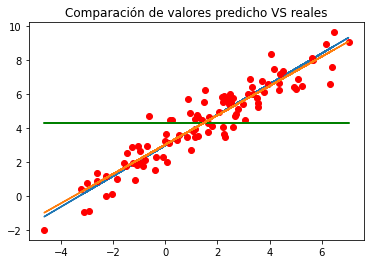

In [13]:
plt.plot(X,y_pred)
plt.plot(X,Y_real,"ro")
plt.plot(X,y_mean_plot,"g")
plt.plot(X,data["y_model_1"])
plt.title("Comparación de valores predicho VS reales")

## Error de la regresión estandar (RSE)

In [30]:
RSE= np.sqrt(SSD_model_1/(len(data)-2))
print("En relación a la media "+str(np.mean(data["y_actual"]))+" Se observa una diferencia de error de "+str(RSE)+", una diferencia del"+str((RSE/np.mean(data["y_actual"])*100))+"%")

En relación a la media 4.336803303845877 Se observa una diferencia de error de 0.8261117564831527, una diferencia del19.048863842880696%
